In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

In [25]:
train = pd.read_csv('group14_train.txt', sep=" ", header=None)
test = pd.read_csv('group14_test.txt', sep=" ", header=None)
val = pd.read_csv('group14_val.txt', sep=" ", header=None)

# take a look at the dataset
train.head(5)

,0,1,2
0,10.0,-7.2,-40.3190
1,0.8,-8.4,-62.8800
2,8.0,-5.2,-19.7320
3,-2.0,3.2,-3.3459
4,4.8,3.6,-11.0860


In [0]:
train_X = np.asanyarray(train[[0,1]])
train_y = np.asanyarray(train[2])
test_X = np.asanyarray(test[[0,1]])
test_y = np.asanyarray(test[2])
val_X = np.asanyarray(val[[0,1]])
val_y = np.asanyarray(val[2])

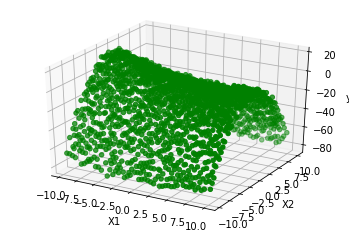

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train[0], train[1], train_y,  color='green')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
plt.show()

In [0]:
p=2

In [29]:
d = train_X.shape[1]
d

2

In [0]:
Z = np.ones((train_X.shape[0], (p+1)**d))
Z_val = np.ones((val_X.shape[0], (p+1)**d))
Z_test = np.ones((test_X.shape[0], (p+1)**d))

In [31]:
train_X[0].shape

(2,)

In [32]:
np.multiply(np.power(train_X[:, 0], 0), np.power(train_X[:, 1], 0)).shape

(2000,)

In [0]:
k = 0
for i in range(0, p+1):
    for j in range(0, p+1):
        Z[:, k] = np.multiply(np.power(train_X[:, 0], i), np.power(train_X[:, 1], j))
        Z_val[:, k] = np.multiply(np.power(val_X[:, 0], i), np.power(val_X[:, 1], j))
        Z_test[:, k] = np.multiply(np.power(test_X[:, 0], i), np.power(test_X[:, 1], j))
        k = k+1

In [0]:
W = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(Z), Z)), np.transpose(Z)), train_y)

In [0]:
y_prediction = np.dot(W, Z.T)
y_val_prediction = np.dot(W, Z_val.T)
y_test_prediction = np.dot(W, Z_test.T)

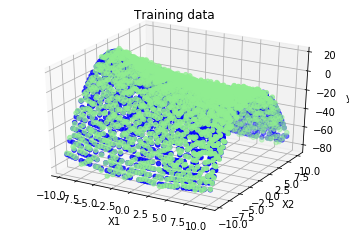

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train[0], train[1], train_y,  color='lightgreen')
ax.scatter(train[0], train[1], y_prediction, color='blue')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.set_title('Training data')
plt.show()

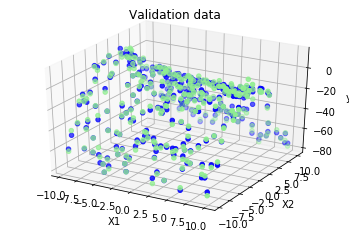

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(val[0], val[1], val_y,  color='lightgreen')
ax.scatter(val[0], val[1], y_val_prediction, color='blue')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.set_title('Validation data')
plt.show()

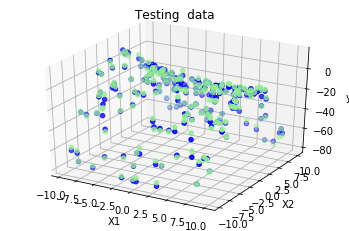

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test[0], test[1], test_y,  color='lightgreen')
ax.scatter(test[0], test[1], y_test_prediction, color='blue')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.set_title('Testing  data')
plt.show()

In [0]:
train_loss_RMS = np.sqrt(np.mean(np.square(y_prediction-train_y)))
val_loss_RMS = np.sqrt(np.mean(np.square(y_val_prediction-val_y)))
test_loss_RMS = np.sqrt(np.mean(np.square(y_test_prediction-test_y)))
losses={'train_loss': train_loss_RMS, 'validation_loss': val_loss_RMS, 'test_loss': test_loss_RMS}

In [40]:
losses

{'test_loss': 2.4043848010099396,
 'train_loss': 2.328898168061139,
 'validation_loss': 2.4115060131562056}

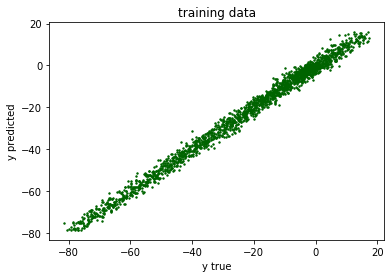

In [41]:
plt.title('training data')
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.scatter(train_y, y_prediction, s = 2, color = 'darkgreen')
plt.show()

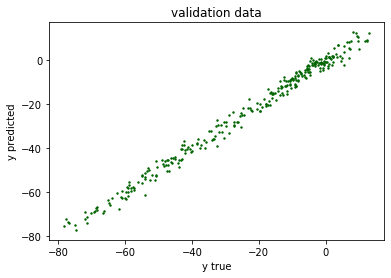

In [42]:
plt.title('validation data')
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.scatter(val_y, y_val_prediction, s = 2, color = 'darkgreen')
plt.show()

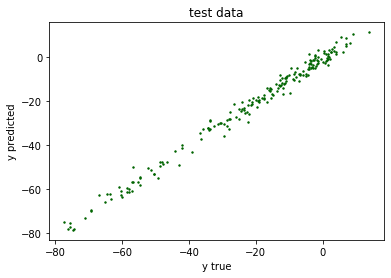

In [43]:
plt.title('test data')
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.scatter(test_y, y_test_prediction, s = 2, color = 'darkgreen')
plt.show()

{'train loss': 24.17580058418796, 'validation loss': 24.09570928755984}
{'train loss': 23.656680983707258, 'validation loss': 23.83687484684972}
{'train loss': 2.328898168061139, 'validation loss': 2.4115060131562056}
{'train loss': 2.322625370590744, 'validation loss': 2.4006780230170057}
{'train loss': 2.318250148676045, 'validation loss': 2.4077129228608927}
{'train loss': 5.958367641297177, 'validation loss': 6.002331744622845}
{'train loss': 7.9709347849758725, 'validation loss': 8.135263726558492}
{'train loss': 17.709801685434357, 'validation loss': 18.33677373564396}
{'train loss': 18.999125925295584, 'validation loss': 19.298669032715612}
{'train loss': 24.023138427852317, 'validation loss': 24.747728668541033}
{'train loss': 23.308318461741308, 'validation loss': 24.47873343196238}


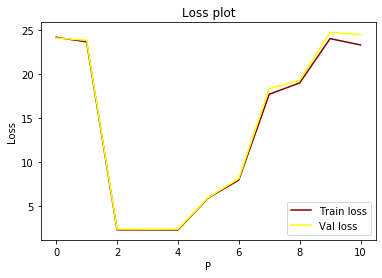

In [44]:
p_min = 0
p_max = 10
verbose = True

TrainLoss = []
ValLoss = []
for p in range(p_min, p_max+1):

    Z = np.ones((train_X.shape[0], (p+1)**d))
    Z_val = np.ones((val_X.shape[0], (p+1)**d))
    if p > 0:

        k = 0

        for i in range(0, p+1):
            for j in range(0, p+1):
                Z[:, k] = np.multiply(np.power(train_X[:, 0], i), np.power(train_X[:, 1], j))
                Z_val[:, k] = np.multiply(np.power(val_X[:, 0], i), np.power(val_X[:, 1], j))
                k = k+1
        

    W = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(Z), Z)), np.transpose(Z)), train_y)


    y_prediction = np.dot(W, Z.T)
    y_val_prediction = np.dot(W, Z_val.T)


    trainlossRMS = np.sqrt(np.mean(np.square(y_prediction-train_y)))
    vallossRMS = np.sqrt(np.mean(np.square(y_val_prediction-val_y)))
    if verbose:
        print({'train loss': trainlossRMS, 'validation loss': vallossRMS})
    TrainLoss.append(trainlossRMS)
    ValLoss.append(vallossRMS)

trainplt = plt.plot(range(p_min, p_max+1), TrainLoss, color = 'maroon', label = 'Train loss')
valplt = plt.plot(range(p_min, p_max+1), ValLoss, color = 'yellow', label = 'Val loss')
plt.title('Loss plot')
plt.xlabel('P')
plt.ylabel('Loss')
plt.legend()